In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install pyspark

In [ ]:
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [ ]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
# Load the main data set into pyspark data frame 
fake = spark.read.csv('/content/drive/MyDrive/Fake.csv', header=True,  mode="DROPMALFORMED")
true = spark.read.csv('/content/drive/MyDrive/True.csv', header=True,  mode="DROPMALFORMED")
print(fake.show())
print(true.show())

+--------------------+--------------------+-------+-----------------+
|               title|                text|subject|             date|
+--------------------+--------------------+-------+-----------------+
| Donald Trump Sen...|Donald Trump just...|   News|December 31, 2017|
| Drunk Bragging T...|House Intelligenc...|   News|December 31, 2017|
| Sheriff David Cl...|On Friday, it was...|   News|December 30, 2017|
| Trump Is So Obse...|On Christmas day,...|   News|December 29, 2017|
| Pope Francis Jus...|Pope Francis used...|   News|December 25, 2017|
| Racist Alabama C...|The number of cas...|   News|December 25, 2017|
| Fresh Off The Go...|Donald Trump spen...|   News|December 23, 2017|
| Trump Said Some ...|In the wake of ye...|   News|December 23, 2017|
| Former CIA Direc...|Many people have ...|   News|December 22, 2017|
| WATCH: Brand-New...|Just when you mig...|   News|December 21, 2017|
| Papa John’s Foun...|A centerpiece of ...|   News|December 21, 2017|
| WATCH: Paul Ryan..

In [ ]:
print('Data overview')
fake.printSchema()
true.printSchema
print('Columns overview')
pd.DataFrame(fake.dtypes, columns = ['Column Name','Data type'])
pd.DataFrame(true.dtypes, columns = ['Column Name','Data type'])


Data overview
root
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- date: string (nullable = true)



<bound method DataFrame.printSchema of DataFrame[title: string, text: string, subject: string, date: string]>

Columns overview


,Column Name,Data type
0,title,string
1,text,string
2,subject,string
3,date,string


,Column Name,Data type
0,title,string
1,text,string
2,subject,string
3,date,string


In [ ]:
# df_false = fake.toPandas()
# df_true = fake.toPandas()
# df_false['label']='FAKE'
# df_true['label']='REAL'
# frames = [df_false, df_true]
# result = pd.concat(frames)
# result = result.sample(frac = 1)
# print(result)

([<matplotlib.patches.Wedge at 0x7f62305f6ad0>,
 [Text(0.7752279700548269, 0.7803983562544661, 'politicsNews'),
  Text(-0.7224333469808057, 0.8295119403420972, 'US_News'),
  Text(-0.9711748856248712, -0.5165455851437688, 'left-news'),
  Text(0.0329377908706883, -1.0995067539276688, 'politics'),
  Text(0.8047322642864699, -0.7499373192583306, 'worldnews'),
  Text(1.0412483652356566, -0.3546855535457755, 'Government News'),
  Text(1.0853006169206671, -0.1792277068748573, 'News'),
  Text(1.098370478934196, -0.05985224311473481, 'Middle-east')])

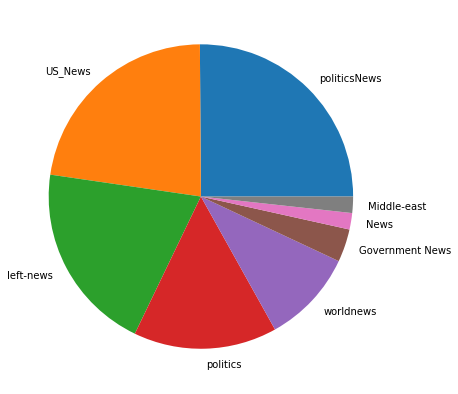

In [ ]:
df_false = pd.read_csv("/content/drive/MyDrive/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/True.csv")
df_false['label']='FAKE'
df_true['label']='REAL'
frames = [df_false, df_true]
result = pd.concat(frames)
result = result.sample(frac = 1)
subs = list(result['subject'].unique())
len = list(result['subject'].value_counts())
fig = plt.figure(figsize =(10, 7))
plt.pie(len, labels = subs)
del result['subject']
result.to_csv('data.csv')
dataset = pd.read_csv("/content/data.csv")
dataset = dataset[:10000]

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
corpus = []

for i in range(0,10000): 
  print(i)
  # Replace non-letters and punctuation with letters
  content = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
  # To make all letters lowercase
  content = content.lower()
  # Split each review into its word
  content = content.split()
  # Classic way of applying stemming
  ps = PorterStemmer()
  # Removing stopwords
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  content = [ps.stem(word) for word in content if not word in set(all_stopwords)]
  content = ' '.join(content)
  corpus.append(content)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Streaming output truncated to the last 5000 lines.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # the parameter sets the limit of words to only most frequent words
X = cv.fit_transform(corpus).toarray()
print(list(X[0]))
y = dataset.iloc[:,-1].values
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(y)
y = le.fit_transform(y)
print(y)

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'REAL']
[1 0 0 ... 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:


#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

A fake news detection algorithm with 99.0% accuracy


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

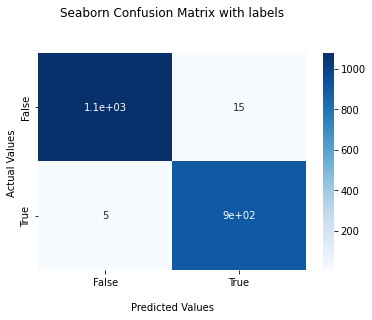

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
# print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_lr)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#NaiveBayesClassifier
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(X_test)

A fake news detection algorithm with 84.2% accuracy


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

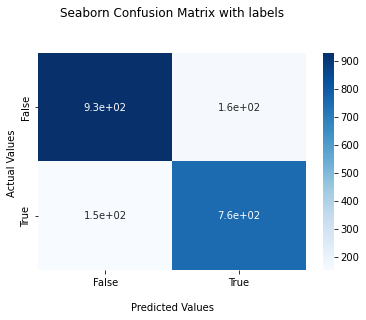

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb), 1), y_test.reshape(len(y_test), 1)),1))
acc = accuracy_score(y_test, y_pred_nb)
acc = round(acc, 4)
print("A fake news detection algorithm with "+str(100 * acc)+"% accuracy")

cf_matrix = confusion_matrix(y_test, y_pred_nb)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Perform same preprocessing operations on the test input
def text_input_clean(example):
    example = re.sub('[^a-zA-Z]', ' ', example)
    example = example.lower()
    example = example.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    example = [ps.stem(word) for word in example if not word in set(all_stopwords)]
    example = ' '.join(example)
    new_corpus = [example]
    new_X_test = cv.transform(new_corpus).toarray()
    
    return new_X_test


In [ ]:
# Taking a text as input
text_input = input('Enter a piece of text: ')
new_X_test = text_input_clean(text_input)
test_y_pred = model_lr.predict(new_X_test)
print(test_y_pred)

Enter a piece of text: Hillary Clinton won the election
[0]
